In [3]:
import pandas as pd
import numpy as np
#사이킷런 데이터셋 iris 데이터셋 로딩
from sklearn import datasets

iris = datasets.load_iris()
iris

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
#데이터 셋 정보 출력
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#특징 이름 출력
print(iris['feature_names'])
print(iris.feature_names)

#꽃의 품종에 해당하는 레이블 출력
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## feature 데이터(x)

In [ ]:
# print(iris['data'], type(iris['data']))
features = iris['data']
print(features[:5])

## label 데이터(y)

In [8]:
# print(iris['target'])
labels = iris['target']
print(labels[:5])

[0 0 0 0 0]


In [9]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df
#컬럼명 변경(cm 제외, 띄어쓰기는 _연결)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [11]:
df['target'] = iris['target']
df

#상위 5개 출력, 하위 5개 출력
df.head()
df.tail()

sepal_length  sepal_width  petal_length  petal_width  target
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

In [24]:
#142행과 중복된 행이 있는지 데이터 프레임으로 출력
# df.loc[(df.sepal_length == 5.8) & (df.petal_width==1.9)]
df.loc[df.duplicated(keep=False)] #중복된 행을 모두 선택하는 메소드(keep=Fasle)

#df.query('sepal_length == 5.8 and petal_length == 1.9')

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target]
Index: []

In [15]:
#중복된 행 제거
df = df.drop_duplicates()
df

sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[149 rows x 5 columns]

# iris 붓꽃 데이터 로드

In [16]:
from IPython.display import Image
Image(url ='https://user-images.githubusercontent.com/15958325/56006707-f69f3680-5d10-11e9-8609-25ba5034607e.png' )

# seaborn 데이터 시각화

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#한글 깨짐 설정(windows)
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist]
print(font_list)

plt.rc('font', family='Malgun Gothic')
#MacOS
#plt.rc('font', family='AppleGothic')


['STIXGeneral', 'STIXSizeTwoSym', 'STIXGeneral', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeOneSym', 'DejaVu Serif', 'cmss10', 'STIXNonUnicode', 'DejaVu Serif Display', 'STIXGeneral', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXSizeFiveSym', 'cmtt10', 'DejaVu Serif', 'STIXSizeFourSym', 'STIXSizeOneSym', 'cmex10', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXNonUnicode', 'cmr10', 'cmb10', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans Display', 'STIXGeneral', 'DejaVu Sans', 'STIXNonUnicode', 'cmsy10', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeTwoSym', 'cmmi10', 'MT Extra', 'Nirmala UI', 'Bookshelf Symbol 7', 'Times New Roman', 'Segoe UI', 'NanumGothicOTF', 'NanumGothicOTF', 'Ink Free', 'Corbel', 'NanumBarunGothic', 'Impact', 'NanumGothic', 'Comic Sans MS', 'Symbol', 'HoloLens MDL2 Assets', 'Palatino Linotype', 'Nanum DdaAgDanDan', 'Book Antiqua', 'Franklin Gothic Medium', 'Arial', 'Times New Roman', 'Trebuchet MS', 'Lucida Console', 

In [41]:
import warnings

#특정 경고 메시지 무시
# warnings.filterwarnings("ignore", category=DeprecationWarning )
# category 매개변수
# DeprecationWarning : 이전 버전의 모듈이나 향후버전에서 제거될 예정임을 나타내는 경고
# RuntimeWarning : 실행중에 발생하는 잠재적인 문제를 나타내는 경고
# FutureWarning : 현재 사용중인 기능이 향후 버전에서 변경될 수 있음을 나타내는 경고
# ImportWarning : 모듈에서 가져오거나 로드할 때 발생하는 문제를 나타내는 경고

#모든 경고 메시지 무시
warnings.filterwarnings("ignore")

#다시 경고 메시지를 표시하려면
# warnings.resetwarnings()

In [30]:
#캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 10)

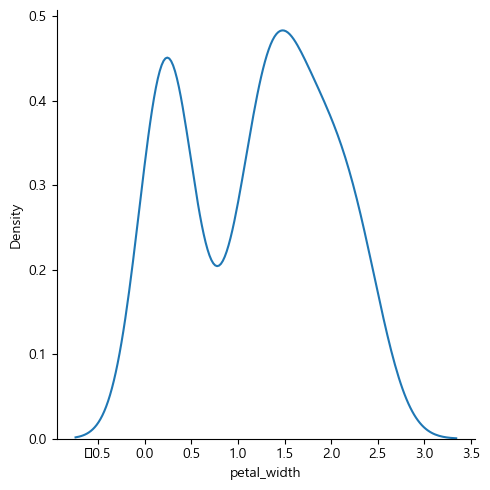

In [40]:
sns.displot(data=df, x='petal_width', kind='kde')

# 데이터 시각화

<Axes: xlabel='petal_width', ylabel='Count'>

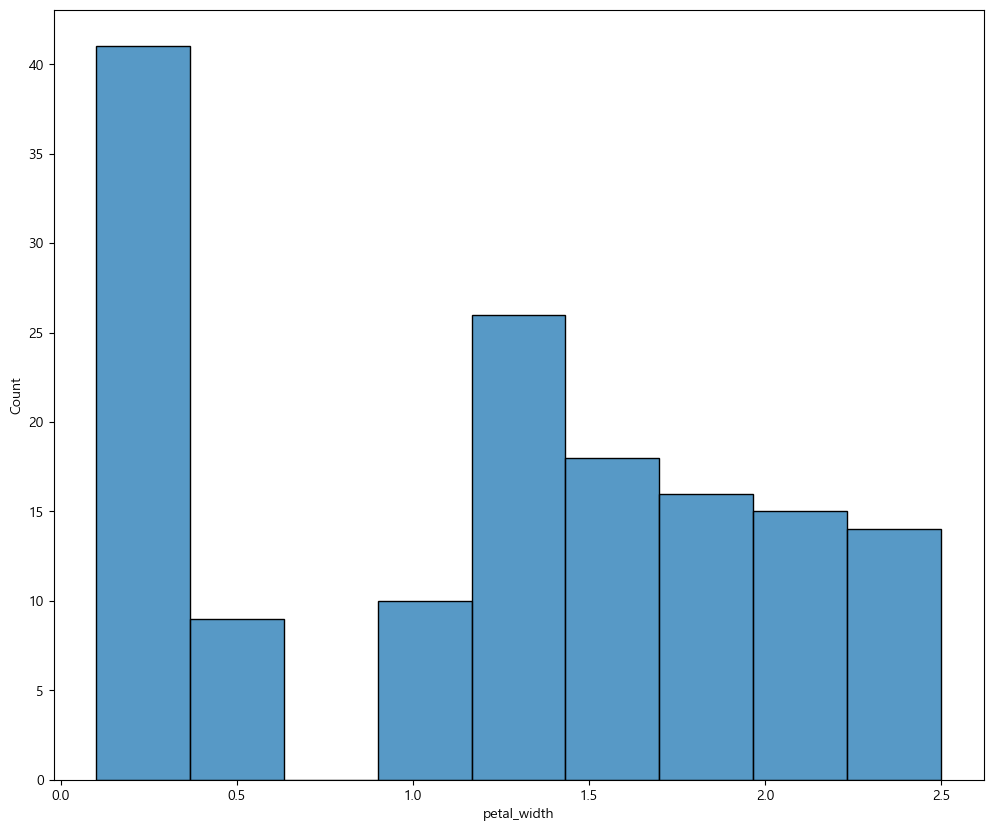

In [43]:
#히스토그램(꽃잎의 너비에 대한 분포 시각화)=petal_width
sns.histplot(x='petal_width', data=df)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

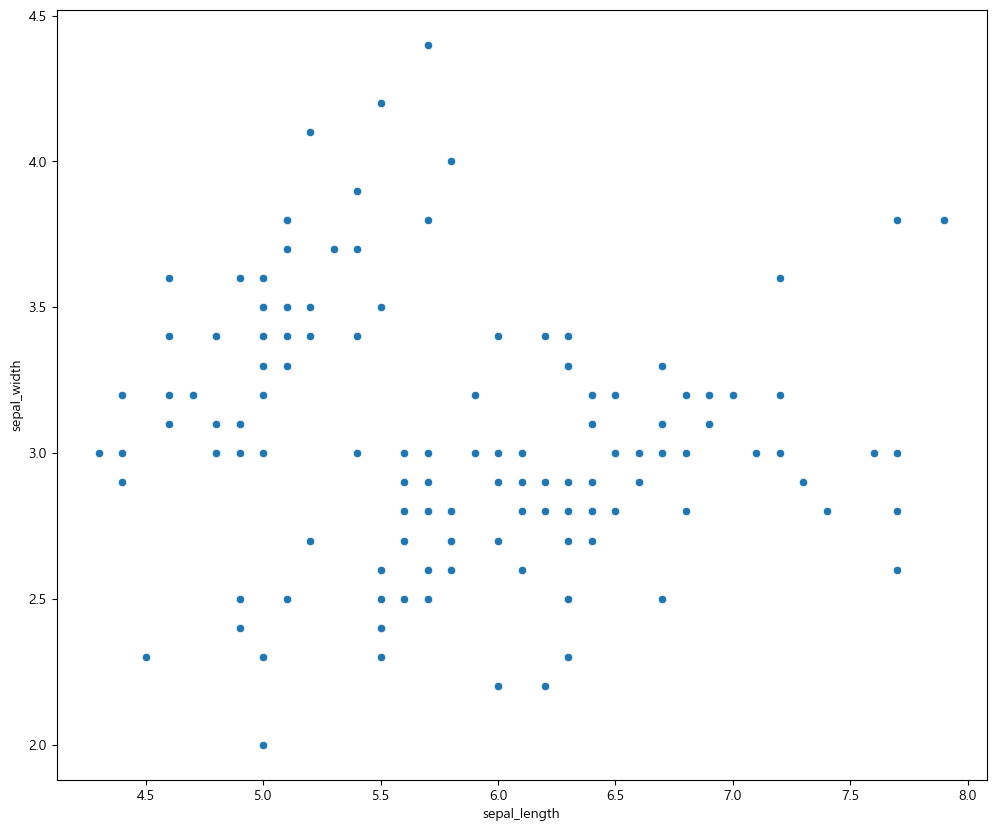

In [44]:
# 산점도(꽃받침 길이와 꽃받침 너비간의 관계 시각화)
sns.scatterplot(x='sepal_length', y='sepal_width', data=df)

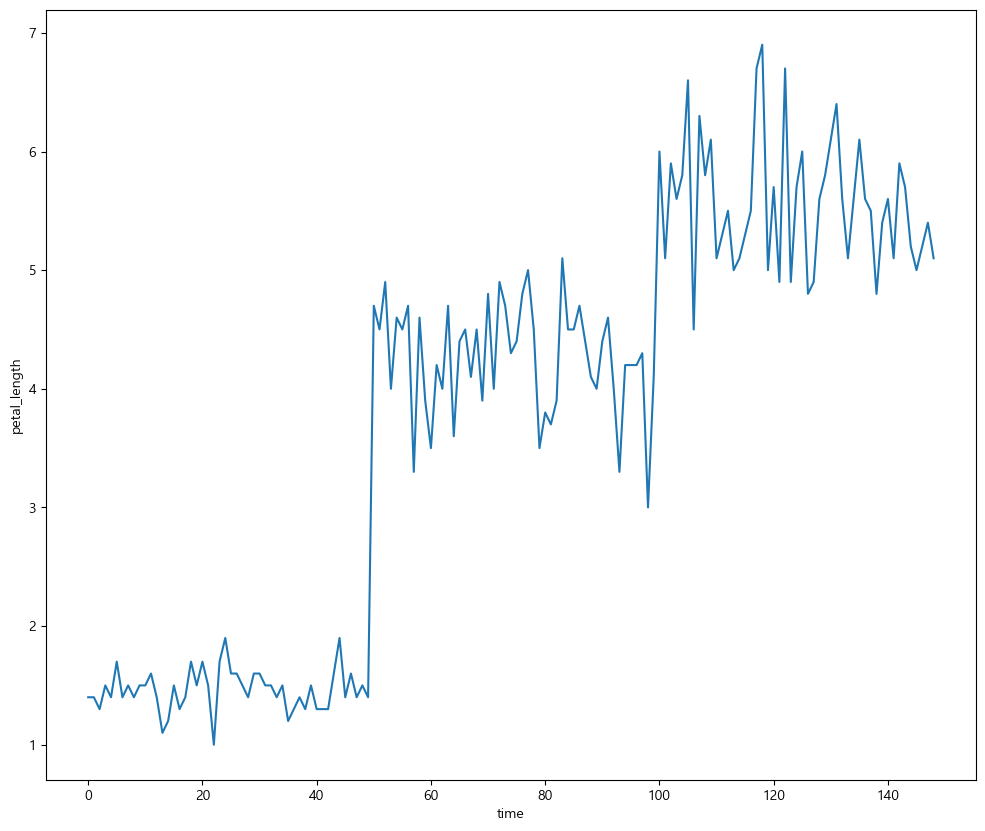

In [46]:
#선 그래프 - 꽃잎길이(petal_length)의 시간에 따른 변화 시각화
#iris 데이터셋은 시계열 데이터가 아니므로 강제로 만들고 사용
df['time'] = range(len(df))
sns.lineplot(x='time', y='petal_length', data=df)

plt.show()

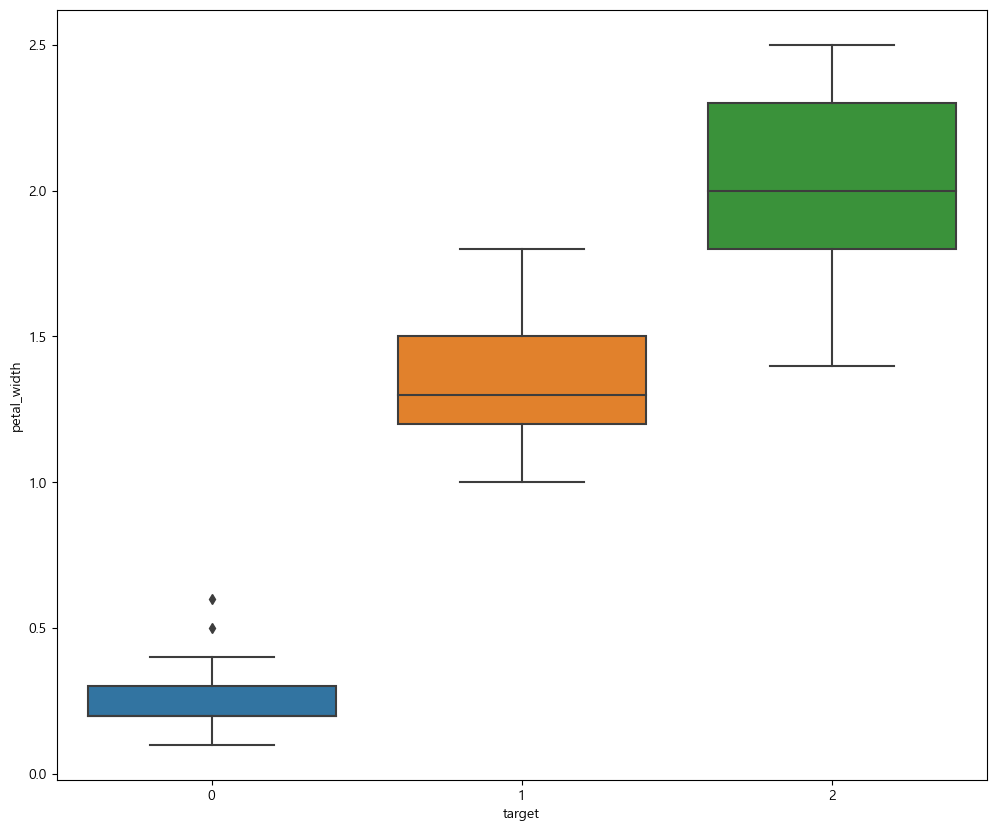

sepal_length  sepal_width  petal_length  petal_width      target  \
count    149.000000   149.000000    149.000000   149.000000  149.000000   
mean       5.843624     3.059732      3.748993     1.194631    0.993289   
std        0.830851     0.436342      1.767791     0.762622    0.817847   
min        4.300000     2.000000      1.000000     0.100000    0.000000   
25%        5.100000     2.800000      1.600000     0.300000    0.000000   
50%        5.800000     3.000000      4.300000     1.300000    1.000000   
75%        6.400000     3.300000      5.100000     1.800000    2.000000   
max        7.900000     4.400000      6.900000     2.500000    2.000000   

             time  
count  149.000000  
mean    74.000000  
std     43.156691  
min      0.000000  
25%     37.000000  
50%     74.000000  
75%    111.000000  
max    148.000000

In [48]:
# 상자그래프(품종별 꽃잎 너비 시각화)

sns.boxplot(x='target', y='petal_width', data=df)
plt.show()
df.describe()

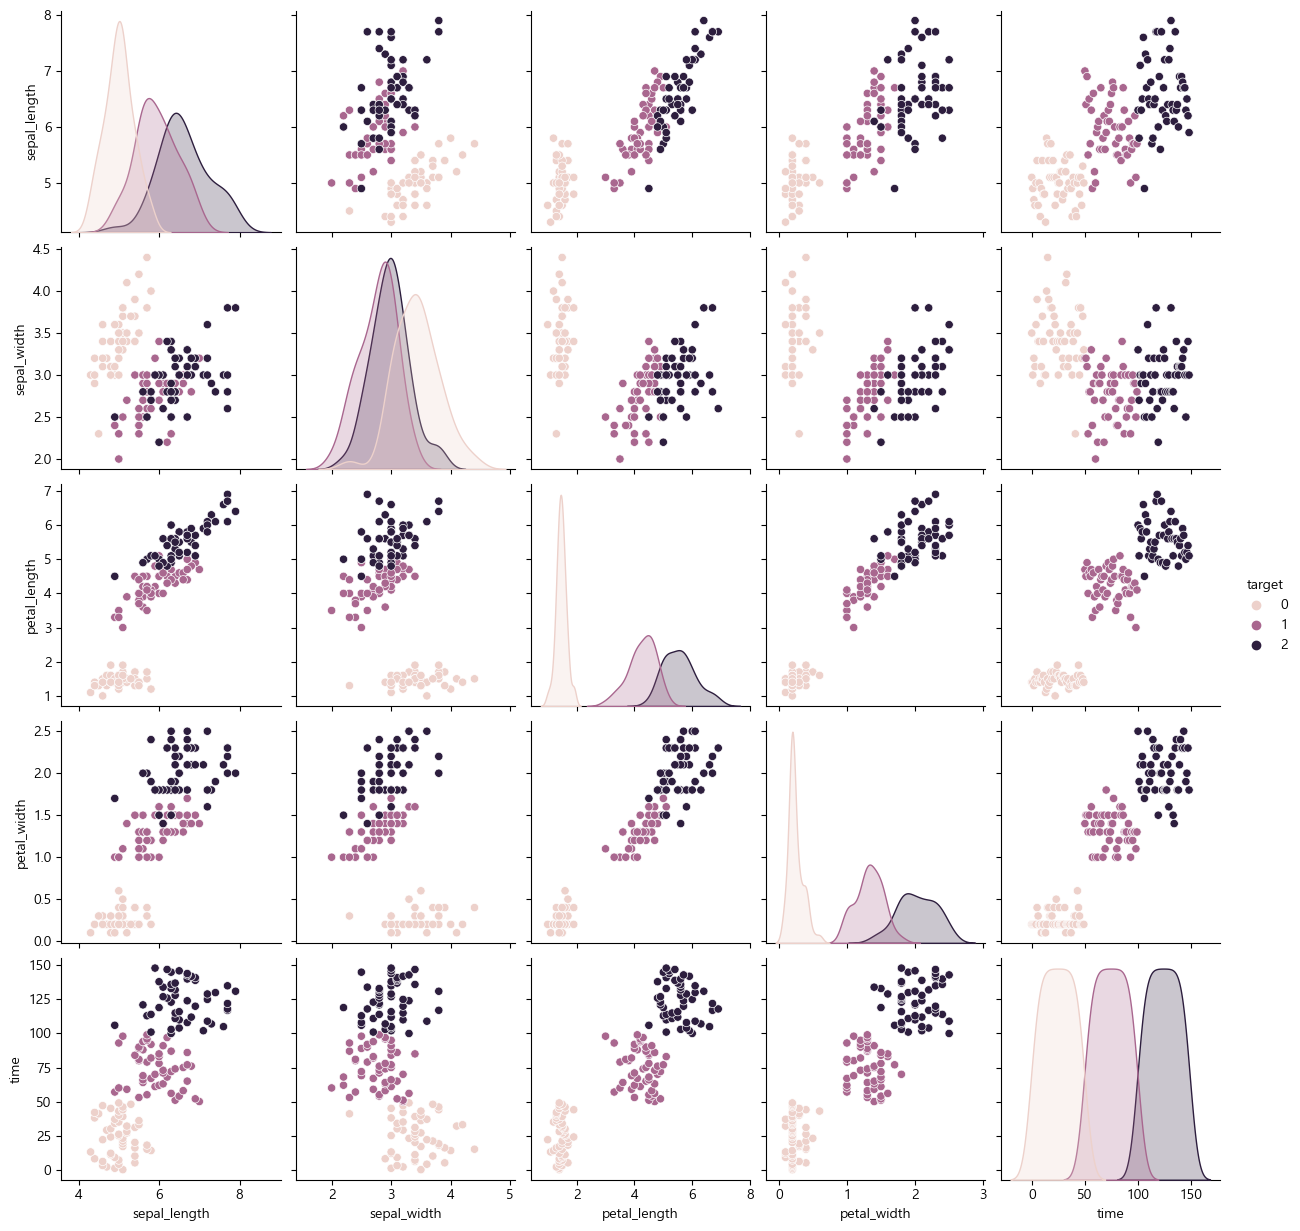

In [50]:
# pairplot 그래프(각 특징들의 쌍에 대한 시각화)
sns.pairplot(df, hue='target')
#df:데이터프레임을 지정
#hue :target열의 값에 따라 구분함
#height :생성되는 그래프의 높이
#diag_kind:대각선에 위치하는 그래프의 종류를 지정(hist가 기본값)
#kde 커널밀도 추정그래프(분포를 부드러운 곡선으로 나타냄)
plt.show()


# Train 데이터 셋과 Test 데이터 셋 분할


In [55]:
from sklearn.model_selection import train_test_split

iris_data = iris.data
print(iris_data.shape)

iris_label = iris.target
print(iris_label.shape)

(150, 4)
(150,)


In [1]:

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris_label,
                                                   test_size=0.2, shuffle = True)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

#X : 특성, y : 타겟값

#test_size : 할당한 비율(20% => 0.2) 기본값 0.25
#random_state : 랜덤시드값
#stratify : 분할된 샘플의 class 개수를 동일한 비율로 유지


NameError: name 'iris_df' is not defined